In [2]:
from openai import OpenAI
from dotenv import load_dotenv
import yaml
import os

load_dotenv()


API_KEY = os.getenv("api_key")
BASE_URL = os.getenv("base_url")

client = OpenAI(
    api_key=API_KEY,  # Replace with your actual API key
    base_url=BASE_URL
)
print("Config loaded")


Config loaded


In [ ]:
response = client.chat.completions.create(
            model="deepseek-chat",
            messages=[
                {"role": "system", "content": "Give json output like column name, data type and min and max length"},
                {"role": "user", "content": "Generate a dataset schema with 5 columns for transaction data. Take the best transaction dataset from kaggle"}
            ]
        )
print(response.choices[0].message.content)

In [3]:
from openai import OpenAI
from schema_agent import SchemaAgent
from schema_models import SchemaPrompt
# Instantiate agent
schema_agent = SchemaAgent(client)

# Define prompt
prompt = SchemaPrompt(
    use_case="Transaction fraud detection",
    prompt='''Generate a User info dataset 
    schema similar to top User info datasets on Kaggle.Creating this.
      Include fields like user name, login time, session time. Need this data set to train a fraud user detection ML model. Decide yourself'''
)

# Get structured output
schema = schema_agent.generate_from_prompt(prompt)

# Print result
print(schema.model_dump_json(indent=2))

{
  "use_case": "Transaction fraud detection",
  "columns": [
    {
      "name": "user_id",
      "type": "int",
      "format": null,
      "values": null
    },
    {
      "name": "user_name",
      "type": "string",
      "format": null,
      "values": null
    },
    {
      "name": "email",
      "type": "string",
      "format": null,
      "values": null
    },
    {
      "name": "phone_number",
      "type": "string",
      "format": null,
      "values": null
    },
    {
      "name": "registration_date",
      "type": "datetime",
      "format": "%Y-%m-%d",
      "values": null
    },
    {
      "name": "last_login_time",
      "type": "datetime",
      "format": "%Y-%m-%d %H:%M:%S",
      "values": null
    },
    {
      "name": "session_duration_seconds",
      "type": "int",
      "format": null,
      "values": null
    },
    {
      "name": "ip_address",
      "type": "string",
      "format": null,
      "values": null
    },
    {
      "name": "device_type",
 

In [2]:
from openai import OpenAI
from schema_agent import SchemaAgent
from schema_models import SchemaPrompt
agent_schema = SchemaAgent(client)
csv_schemaprompt = SchemaPrompt(
    use_case = "Iris dataset transaction",
    csv_path = "C:\\Users\\HOME\\Downloads\\archive\\iris.csv"
)
csv_schema = agent_schema.generate_from_csv(csv_schemaprompt)
print(csv_schema.model_dump_json(indent=2))

{
  "use_case": "Iris dataset transaction",
  "columns": [
    {
      "name": "Id",
      "type": "int",
      "format": null,
      "values": null
    },
    {
      "name": "SepalLengthCm",
      "type": "float",
      "format": null,
      "values": null
    },
    {
      "name": "SepalWidthCm",
      "type": "float",
      "format": null,
      "values": null
    },
    {
      "name": "PetalLengthCm",
      "type": "float",
      "format": null,
      "values": null
    },
    {
      "name": "PetalWidthCm",
      "type": "float",
      "format": null,
      "values": null
    },
    {
      "name": "Species",
      "type": "categorical",
      "format": null,
      "values": [
        "Iris-setosa",
        "Iris-versicolor",
        "Iris-virginica"
      ]
    }
  ]
}


{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "age": {
            "sdtype": "id"
        },
        "income": {
            "sdtype": "numerical"
        },
        "gender": {
            "sdtype": "categorical"
        }
    },
    "primary_key": "age"
}


C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sdv\single_table\base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sdv\single_table\base.py:128: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sdv\single_table\base.py:162: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
C:\Users\HOME\AppData\Local\Packages\PythonSo

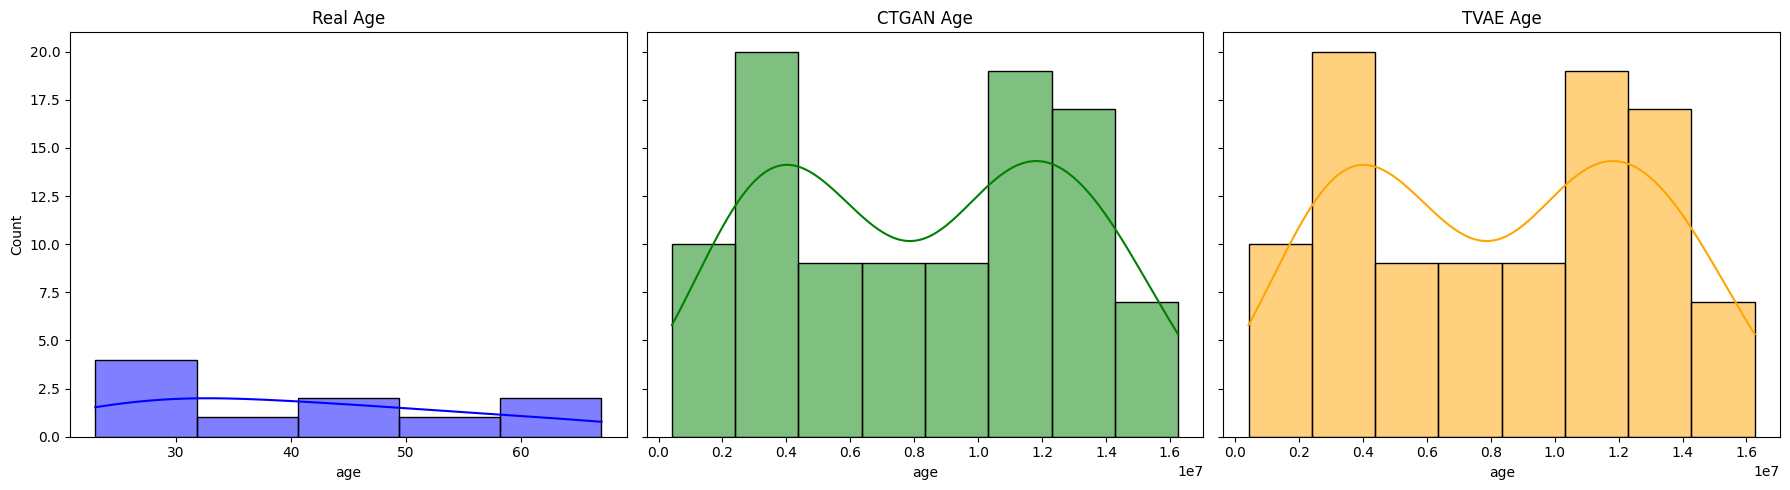

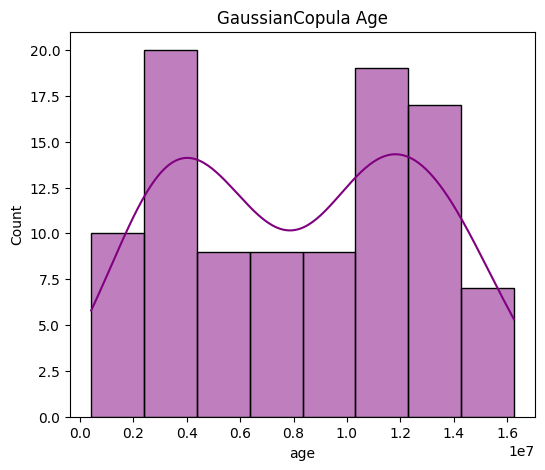

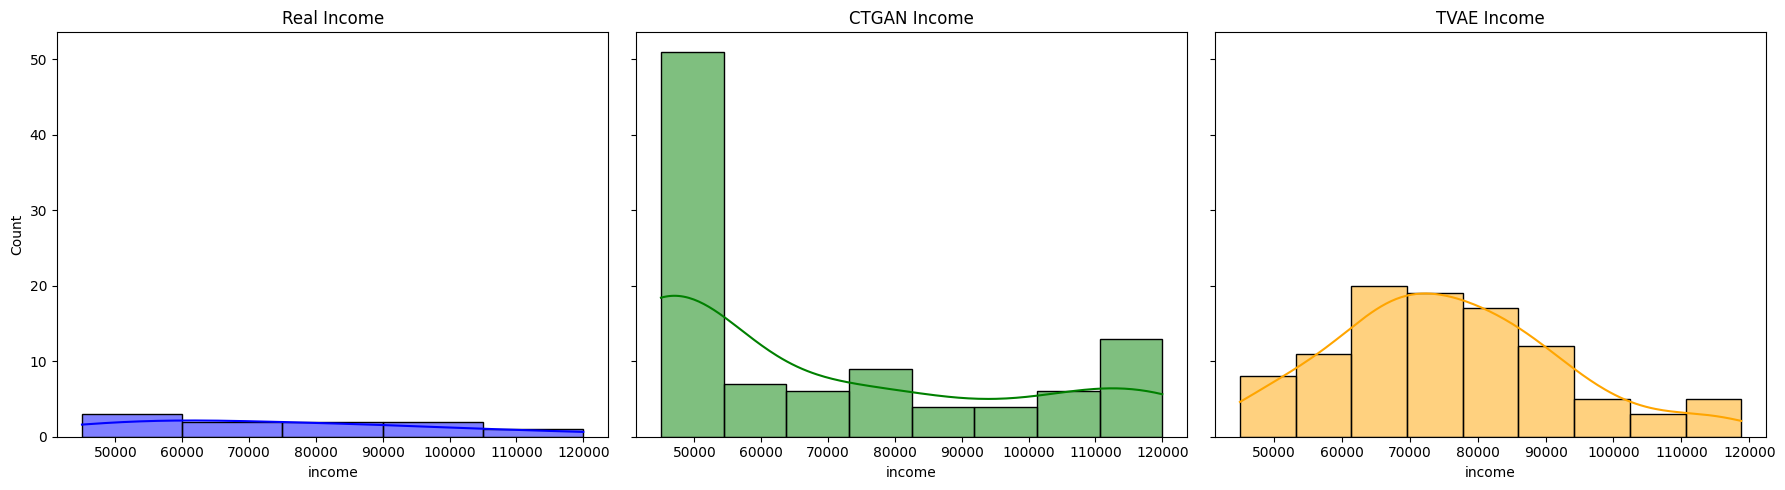

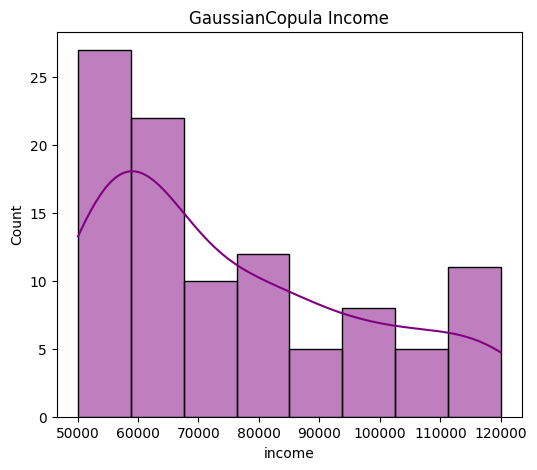

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer, TVAESynthesizer, GaussianCopulaSynthesizer

# Sample real dataset
real_data = pd.DataFrame({
    "age": [25, 34, 45, 23, 67, 30, 50, 44, 31, 60],
    "income": [50000, 60000, 80000, 45000, 120000, 55000, 90000, 78000, 62000, 100000],
    "gender": ["M", "F", "M", "F", "M", "F", "M", "F", "F", "M"]
})

# Create metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

print(metadata)

# Train synthesizers
ctgan = CTGANSynthesizer(metadata)
ctgan.fit(real_data)
ctgan_sample = ctgan.sample(100)

tvae = TVAESynthesizer(metadata)
tvae.fit(real_data)
tvae_sample = tvae.sample(100)

copula = GaussianCopulaSynthesizer(metadata)
copula.fit(real_data)
copula_sample = copula.sample(100)

# Plot comparison
def plot_distribution_comparison(real, synthetic_list, title):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    sns.histplot(real, color='blue', kde=True, ax=axes[0])
    axes[0].set_title(f'Real {title}')
    
    sns.histplot(synthetic_list[0], color='green', kde=True, ax=axes[1])
    axes[1].set_title(f'CTGAN {title}')
    
    sns.histplot(synthetic_list[1], color='orange', kde=True, ax=axes[2])
    axes[2].set_title(f'TVAE {title}')
    
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.histplot(synthetic_list[2], color='purple', kde=True)
    plt.title(f'GaussianCopula {title}')
    plt.show()

plot_distribution_comparison(real_data["age"], [ctgan_sample["age"], tvae_sample["age"], copula_sample["age"]], "Age")
plot_distribution_comparison(real_data["income"], [ctgan_sample["income"], tvae_sample["income"], copula_sample["income"]], "Income")


In [5]:
print(ctgan_sample)

         age  income gender
0    3351736   45000      F
1    5830516  120000      M
2    6007635   50398      F
3   12786459  107037      M
4   14974591   45000      F
..       ...     ...    ...
95  13307404  118382      M
96  11091160  111117      M
97   4075350   66342      M
98   4244999  106247      F
99   5522976   45000      F

[100 rows x 3 columns]
